<a href="https://colab.research.google.com/github/Smast3r/FlutterChatbot/blob/main/Copy_of_PySpark_Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Running Pyspark in Colab**

To run spark in Colab, we need to first install all the dependencies in Colab environment i.e. Apache Spark 2.3.2 with hadoop 2.7, Java 8 and Findspark to locate the spark in the system. The tools installation can be carried out inside the Jupyter Notebook of the Colab. One important note is that if you are new in Spark, it is better to avoid Spark 2.4.0 version since some people have already complained about its compatibility issue with python. 
Follow the steps to install the dependencies:

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://dlcdn.apache.org/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
!tar xf spark-3.2.1-bin-hadoop3.2.tgz
!pip install -q findspark

Now that you installed Spark and Java in Colab, it is time to set the environment path which enables you to run Pyspark in your Colab environment. Set the location of Java and Spark by running the following code:

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop3.2"

Run a local spark session to test your installation:

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

Congrats! Your Colab is ready to run Pyspark. Let's build a simple Linear Regression model.

# Linear Regression Model


Linear Regression model is one the oldest and widely used machine learning approach which assumes a relationship between dependent and independent variables. For example, a modeler might want to predict the forecast of the rain based on the humidity ratio. Linear Regression consists of the best fitting line through the scattered points on the graph and the best fitting line is known as the regression line.

The goal of this exercise to predict the housing prices by the given features. Let's predict the prices of the Boston Housing dataset by considering MEDV as the output variable and all the other variables as input.

Download the dataset from [here](https://github.com/asifahmed90/pyspark-ML-in-Colab/blob/master/BostonHousing.csv) and keep it somewhere on your computer. Load the dataset into your Colab directory from your local system:

In [ ]:
from google.colab import files
files.upload()

KeyboardInterrupt: ignored

Check the dataset is uploaded correctly in the system by the following command

In [ ]:
!ls

2009.csv     spark-3.2.1-bin-hadoop3.2	    spark-3.2.1-bin-hadoop3.2.tgz.1
sample_data  spark-3.2.1-bin-hadoop3.2.tgz  spark-3.2.1-bin-hadoop3.2.tgz.2


In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json


In [ ]:
! kaggle datasets download yuanyuwendymu/airline-delay-and-cancellation-data-2009-2018

100% 1.94G/1.95G [00:13<00:00, 204MB/s]
100% 1.95G/1.95G [00:13<00:00, 152MB/s]


In [ ]:
!ls

sample_data  spark-3.2.1-bin-hadoop3.2	spark-3.2.1-bin-hadoop3.2.tgz


In [ ]:
! unzip airline-delay-and-cancellation-data-2009-2018.zip

Archive:  airline-delay-and-cancellation-data-2009-2018.zip
  inflating: 2009.csv                
  inflating: 2010.csv                
  inflating: 2011.csv                
  inflating: 2012.csv                
  inflating: 2013.csv                
  inflating: 2014.csv                
  inflating: 2015.csv                
  inflating: 2016.csv                
  inflating: 2017.csv                
  inflating: 2018.csv                


Now that we have uploaded the dataset, we can start analyzing. 
For our linear regression model we need to import two modules from Pyspark i.e. Vector Assembler and Linear Regression. Vector Assembler is a transformer that assembles all the features into one vector from multiple columns that contain type double. We could have used StringIndexer if any of our columns contains string values to convert it into numeric values. Luckily, the BostonHousing dataset only contains double values, so we don't need to worry about StringIndexer for now.

In [ ]:


dataset = spark.read.csv('2009.csv',inferSchema=True, header =True)

Notice that we used InferSchema inside read.csv mofule. InferSchema enables us to infer automatically different data types for each column.

Let us print look into the dataset to see the data types of each column:

In [ ]:
dataset.printSchema()

root
 |-- FL_DATE: string (nullable = true)
 |-- OP_CARRIER: string (nullable = true)
 |-- OP_CARRIER_FL_NUM: integer (nullable = true)
 |-- ORIGIN: string (nullable = true)
 |-- DEST: string (nullable = true)
 |-- CRS_DEP_TIME: integer (nullable = true)
 |-- DEP_TIME: double (nullable = true)
 |-- DEP_DELAY: double (nullable = true)
 |-- TAXI_OUT: double (nullable = true)
 |-- WHEELS_OFF: double (nullable = true)
 |-- WHEELS_ON: double (nullable = true)
 |-- TAXI_IN: double (nullable = true)
 |-- CRS_ARR_TIME: integer (nullable = true)
 |-- ARR_TIME: double (nullable = true)
 |-- ARR_DELAY: double (nullable = true)
 |-- CANCELLED: double (nullable = true)
 |-- CANCELLATION_CODE: string (nullable = true)
 |-- DIVERTED: double (nullable = true)
 |-- CRS_ELAPSED_TIME: double (nullable = true)
 |-- ACTUAL_ELAPSED_TIME: double (nullable = true)
 |-- AIR_TIME: double (nullable = true)
 |-- DISTANCE: double (nullable = true)
 |-- CARRIER_DELAY: double (nullable = true)
 |-- WEATHER_DELAY: do

Next step is to convert all the features from different columns into a single column and let's call this new vector column as 'Attributes' in the outputCol.

In [ ]:
from pyspark.ml.feature import VectorAssembler

#Input all the features in one vector column
assembler = VectorAssembler(inputCols=['DISTANCE','ACTUAL_ELAPSED_TIME'], outputCol = 'Attributes',handleInvalid = "skip")

output = assembler.transform(dataset)
output = output.fillna(0)

#Input vs Output
finalized_data = output.select("Attributes","Air_TIME")

finalized_data.show()

+-------------+--------+
|   Attributes|Air_TIME|
+-------------+--------+
| [199.0,68.0]|    42.0|
| [213.0,75.0]|    43.0|
| [199.0,62.0]|    36.0|
| [199.0,56.0]|    37.0|
| [213.0,77.0]|    40.0|
|[745.0,130.0]|    96.0|
|[554.0,108.0]|    91.0|
| [199.0,79.0]|    36.0|
| [199.0,73.0]|    41.0|
| [199.0,61.0]|    39.0|
| [199.0,62.0]|    41.0|
| [199.0,64.0]|    40.0|
| [310.0,66.0]|    51.0|
| [199.0,54.0]|    34.0|
|[719.0,110.0]|    88.0|
|[719.0,151.0]|   127.0|
|[719.0,111.0]|    89.0|
|[719.0,144.0]|   124.0|
|[719.0,142.0]|    88.0|
|[719.0,150.0]|   126.0|
+-------------+--------+
only showing top 20 rows



Here, 'Attributes' are in the input features from all the columns and 'medv' is the target column.
Next, we should split the training and testing data according to our dataset (0.8 and 0.2 in this case).

In [ ]:
from pyspark.ml.regression import LinearRegression

#Split training and testing data

train_data,test_data = finalized_data.randomSplit([0.8,0.2])


regressor = LinearRegression(featuresCol = 'Attributes', labelCol = 'Air_TIME')

#Learn to fit the model from training set
regressor = regressor.fit(train_data)

#To predict the prices on testing set
pred = regressor.evaluate(test_data)
print(pred.accuracy)

#Predict the model
pred.predictions.show(50)

ERROR:root:KeyboardInterrupt while sending command.
Traceback (most recent call last):
  File "/content/spark-3.2.1-bin-hadoop3.2/python/lib/py4j-0.10.9.3-src.zip/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/content/spark-3.2.1-bin-hadoop3.2/python/lib/py4j-0.10.9.3-src.zip/py4j/clientserver.py", line 475, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
  File "/usr/lib/python3.7/socket.py", line 589, in readinto
    return self._sock.recv_into(b)
KeyboardInterrupt


KeyboardInterrupt: ignored

We can also print the coefficient and intercept of the regression model by using the following command:

In [ ]:
#coefficient of the regression model
coeff = regressor.coefficients

#X and Y intercept
intr = regressor.intercept

print ("The coefficient of the model is : %a" %coeff)
print ("The Intercept of the model is : %f" %intr)


The coefficient of the model is : DenseVector([-0.1239, 0.056, 0.0205, 2.7283, -16.8634, 3.218, 0.0163, -1.4331, 0.3657, -0.0134, -0.9328, 0.0096, -0.6229])
The Intercept of the model is : 39.049826


# Basic Statistical Analysis

Once we are done with the basic linear regression operation, we can go a bit further and analyze our model statistically by importing RegressionEvaluator module from Pyspark.

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator
eval = RegressionEvaluator(labelCol="Air_TIME", predictionCol="prediction", metricName="rmse")

# Root Mean Square Error
rmse = eval.evaluate(pred.predictions)
print("RMSE: %.3f" % rmse)

# Mean Square Error
mse = eval.evaluate(pred.predictions, {eval.metricName: "mse"})
print("MSE: %.3f" % mse)

# Mean Absolute Error
mae = eval.evaluate(pred.predictions, {eval.metricName: "mae"})
print("MAE: %.3f" % mae)

# r2 - coefficient of determination
r2 = eval.evaluate(pred.predictions, {eval.metricName: "r2"})
print("r2: %.3f" %r2)



/content/spark-3.2.1-bin-hadoop3.2/python/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


RMSE: 9.199
MSE: 84.616
MAE: 6.583
r2: 0.982


# Phase 2: Classification


In [ ]:
#reading the data from the file into the dataset 
dataset = spark.read.csv('2009.csv',inferSchema=True, header =True)
dataset.printSchema()

root
 |-- FL_DATE: string (nullable = true)
 |-- OP_CARRIER: string (nullable = true)
 |-- OP_CARRIER_FL_NUM: integer (nullable = true)
 |-- ORIGIN: string (nullable = true)
 |-- DEST: string (nullable = true)
 |-- CRS_DEP_TIME: integer (nullable = true)
 |-- DEP_TIME: double (nullable = true)
 |-- DEP_DELAY: double (nullable = true)
 |-- TAXI_OUT: double (nullable = true)
 |-- WHEELS_OFF: double (nullable = true)
 |-- WHEELS_ON: double (nullable = true)
 |-- TAXI_IN: double (nullable = true)
 |-- CRS_ARR_TIME: integer (nullable = true)
 |-- ARR_TIME: double (nullable = true)
 |-- ARR_DELAY: double (nullable = true)
 |-- CANCELLED: double (nullable = true)
 |-- CANCELLATION_CODE: string (nullable = true)
 |-- DIVERTED: double (nullable = true)
 |-- CRS_ELAPSED_TIME: double (nullable = true)
 |-- ACTUAL_ELAPSED_TIME: double (nullable = true)
 |-- AIR_TIME: double (nullable = true)
 |-- DISTANCE: double (nullable = true)
 |-- CARRIER_DELAY: double (nullable = true)
 |-- WEATHER_DELAY: do

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import StringIndexer


# i think i'm converting catigurical to numirical here 

indexer = StringIndexer(inputCols=["DEST","ORIGIN","DEP_TIME","OP_CARRIER","CANCELLATION_CODE"], outputCols=["DEST_","ORIGIN_","DEP_TIME_","OP_CARRIER_","CANCELLATION_CODE_"],handleInvalid="skip")
indexed = indexer.fit(dataset).transform(dataset)
indexed = indexed.fillna(0)

# then assemple the outputs here :) 

assembler = VectorAssembler(inputCols=['DEST_','ORIGIN_','DEP_TIME_','OP_CARRIER_'], outputCol = 'Attributes',handleInvalid = "skip")
output = assembler.transform(indexed)
output = output.fillna(0)

#Input vs Output
finalized_data = output.select("Attributes","CANCELLATION_CODE_").filter("CANCELLATION_CODE is NOT NULL")

finalized_data.show()



+--------------------+------------------+
|          Attributes|CANCELLATION_CODE_|
+--------------------+------------------+
|[194.0,4.0,156.0,...|               0.0|
|[183.0,10.0,88.0,...|               0.0|
| [7.0,2.0,125.0,5.0]|               1.0|
|[15.0,14.0,295.0,...|               1.0|
|[22.0,4.0,999.0,3.0]|               0.0|
|[22.0,4.0,198.0,3.0]|               0.0|
|[286.0,69.0,394.0...|               1.0|
|[57.0,13.0,743.0,...|               1.0|
|[34.0,45.0,46.0,1...|               1.0|
|[8.0,107.0,338.0,...|               1.0|
|[41.0,36.0,7.0,16.0]|               1.0|
|[180.0,0.0,972.0,...|               0.0|
|[166.0,0.0,975.0,...|               0.0|
|[1.0,23.0,231.0,3.0]|               1.0|
|[70.0,24.0,82.0,9.0]|               0.0|
|[278.0,12.0,811.0...|               0.0|
|[156.0,10.0,877.0...|               1.0|
|[10.0,66.0,801.0,...|               1.0|
|[195.0,10.0,896.0...|               1.0|
|[79.0,3.0,943.0,2.0]|               0.0|
+--------------------+------------

In [ ]:
from pyspark.ml.classification import LogisticRegression


train_data,test_data = finalized_data.randomSplit([0.8,0.2])

lr = LogisticRegression(featuresCol="Attributes",labelCol="CANCELLATION_CODE_",maxIter=10, regParam=0.3, elasticNetParam=0.8)
lrModel = lr.fit(train_data)


pred = lrModel.evaluate(test_data)
print(pred.accuracy)


pred.predictions.show(50)

0.5155875299760192


/content/spark-3.2.1-bin-hadoop3.2/python/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


+--------------------+------------------+--------------------+--------------------+----------+
|          Attributes|CANCELLATION_CODE_|       rawPrediction|         probability|prediction|
+--------------------+------------------+--------------------+--------------------+----------+
| [0.0,2.0,866.0,1.0]|               1.0|[0.08401993503223...|[0.32064707708865...|       1.0|
|[0.0,16.0,461.0,1...|               1.0|[0.08401993503223...|[0.32064707708865...|       1.0|
|[0.0,23.0,144.0,4.0]|               1.0|[0.08401993503223...|[0.32064707708865...|       1.0|
|[0.0,35.0,118.0,2.0]|               2.0|[0.08401993503223...|[0.32064707708865...|       1.0|
|[0.0,35.0,240.0,1...|               0.0|[0.08401993503223...|[0.32064707708865...|       1.0|
|[0.0,49.0,312.0,8.0]|               1.0|[0.08401993503223...|[0.32064707708865...|       1.0|
|[0.0,67.0,610.0,8.0]|               0.0|[0.08401993503223...|[0.32064707708865...|       1.0|
|[0.0,67.0,807.0,8.0]|               1.0|[0.084019

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator
eval = RegressionEvaluator(labelCol="CANCELLATION_CODE_", predictionCol="prediction", metricName="rmse")
# Root Mean Square Error
rmse = eval.evaluate(pred.predictions)
print("RMSE: %.3f" % rmse)

# Mean Square Error
mse = eval.evaluate(pred.predictions, {eval.metricName: "mse"})
print("MSE: %.3f" % mse)

# Mean Absolute Error
mae = eval.evaluate(pred.predictions, {eval.metricName: "mae"})
print("MAE: %.3f" % mae)

# r2 - coefficient of determination
r2 = eval.evaluate(pred.predictions, {eval.metricName: "r2"})
print("r2: %.3f" %r2)



/content/spark-3.2.1-bin-hadoop3.2/python/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


RMSE: 0.679
MSE: 0.461
MAE: 0.461
r2: -0.061


#**Now we move to the next classification problem we will predict the canslation status this time**

>



In [ ]:
#reading the data from the file into the dataset 
dataset = spark.read.csv('2009.csv',inferSchema=True, header =True)
dataset.printSchema()

root
 |-- FL_DATE: string (nullable = true)
 |-- OP_CARRIER: string (nullable = true)
 |-- OP_CARRIER_FL_NUM: integer (nullable = true)
 |-- ORIGIN: string (nullable = true)
 |-- DEST: string (nullable = true)
 |-- CRS_DEP_TIME: integer (nullable = true)
 |-- DEP_TIME: double (nullable = true)
 |-- DEP_DELAY: double (nullable = true)
 |-- TAXI_OUT: double (nullable = true)
 |-- WHEELS_OFF: double (nullable = true)
 |-- WHEELS_ON: double (nullable = true)
 |-- TAXI_IN: double (nullable = true)
 |-- CRS_ARR_TIME: integer (nullable = true)
 |-- ARR_TIME: double (nullable = true)
 |-- ARR_DELAY: double (nullable = true)
 |-- CANCELLED: double (nullable = true)
 |-- CANCELLATION_CODE: string (nullable = true)
 |-- DIVERTED: double (nullable = true)
 |-- CRS_ELAPSED_TIME: double (nullable = true)
 |-- ACTUAL_ELAPSED_TIME: double (nullable = true)
 |-- AIR_TIME: double (nullable = true)
 |-- DISTANCE: double (nullable = true)
 |-- CARRIER_DELAY: double (nullable = true)
 |-- WEATHER_DELAY: do

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import StringIndexer


# i think i'm converting catigurical to numirical here 

indexer = StringIndexer(inputCols=["DEST","ORIGIN","DEP_TIME","OP_CARRIER"], outputCols=["DEST_","ORIGIN_","DEP_TIME_","OP_CARRIER_"],handleInvalid="skip")
indexed = indexer.fit(dataset).transform(dataset)
indexed = indexed.fillna(0)

# then assemple the outputs here :) 

assembler = VectorAssembler(inputCols=['DEST_','ORIGIN_','DEP_TIME_','OP_CARRIER_'], outputCol = 'Attributes',handleInvalid = "skip")
output = assembler.transform(indexed)
output = output.fillna(0)

#Input vs Output
finalized_data = output.select("Attributes","CANCELLED")

finalized_data.show()

+--------------------+---------+
|          Attributes|CANCELLED|
+--------------------+---------+
|[14.0,23.0,164.0,...|      0.0|
|[26.0,14.0,555.0,...|      0.0|
|[23.0,14.0,136.0,...|      0.0|
|[14.0,23.0,467.0,...|      0.0|
|[14.0,26.0,75.0,7.0]|      0.0|
|[14.0,0.0,605.0,7.0]|      0.0|
|[0.0,32.0,625.0,7.0]|      0.0|
|[14.0,23.0,469.0,...|      0.0|
|[23.0,14.0,84.0,7.0]|      0.0|
|[23.0,14.0,54.0,7.0]|      0.0|
|[14.0,23.0,151.0,...|      0.0|
|[23.0,14.0,944.0,...|      0.0|
|[23.0,32.0,38.0,7.0]|      0.0|
|[14.0,23.0,932.0,...|      0.0|
| [14.0,1.0,13.0,7.0]|      0.0|
|[1.0,14.0,416.0,7.0]|      0.0|
|[14.0,1.0,719.0,7.0]|      0.0|
|[1.0,14.0,786.0,7.0]|      0.0|
|[14.0,1.0,607.0,7.0]|      0.0|
|[1.0,14.0,521.0,7.0]|      0.0|
+--------------------+---------+
only showing top 20 rows



In [ ]:
from pyspark.ml.classification import LogisticRegression


train_data,test_data = finalized_data.randomSplit([0.8,0.2])

lr = LogisticRegression(featuresCol="Attributes",labelCol="CANCELLED",maxIter=10, regParam=0.3, elasticNetParam=0.8)
lrModel = lr.fit(train_data)


pred = lrModel.evaluate(test_data)
print("accuracy"," %",pred.accuracy*100)
pred.predictions.show(10)


accuracy  % 99.93458881870241


/content/spark-3.2.1-bin-hadoop3.2/python/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


+------------------+---------+--------------------+--------------------+----------+
|        Attributes|CANCELLED|       rawPrediction|         probability|prediction|
+------------------+---------+--------------------+--------------------+----------+
| [0.0,1.0,2.0,6.0]|      0.0|[7.32565887502524...|[0.99934200753893...|       0.0|
| [0.0,1.0,3.0,6.0]|      0.0|[7.32565887502524...|[0.99934200753893...|       0.0|
| [0.0,1.0,4.0,4.0]|      0.0|[7.32565887502524...|[0.99934200753893...|       0.0|
| [0.0,1.0,5.0,4.0]|      0.0|[7.32565887502524...|[0.99934200753893...|       0.0|
| [0.0,1.0,8.0,1.0]|      0.0|[7.32565887502524...|[0.99934200753893...|       0.0|
| [0.0,1.0,8.0,1.0]|      0.0|[7.32565887502524...|[0.99934200753893...|       0.0|
| [0.0,1.0,8.0,6.0]|      0.0|[7.32565887502524...|[0.99934200753893...|       0.0|
|[0.0,1.0,11.0,4.0]|      0.0|[7.32565887502524...|[0.99934200753893...|       0.0|
|[0.0,1.0,20.0,4.0]|      0.0|[7.32565887502524...|[0.99934200753893...|    

# Phase 3: clustring 

In [ ]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.sql.functions import col

dataset = spark.read.csv('2009.csv',inferSchema=True, header =True).select("DEP_TIME")

dataset= dataset.withColumn("DEP_TIME",col("DEP_TIME")/100)
dataset.printSchema()
dataset.show(10)



root
 |-- DEP_TIME: double (nullable = true)

+--------+
|DEP_TIME|
+--------+
|   10.58|
|   15.09|
|   10.59|
|   12.49|
|   17.05|
|   19.13|
|   16.37|
|   19.08|
|    17.1|
|   12.55|
+--------+
only showing top 10 rows



In [ ]:
from pyspark.ml.feature import VectorAssembler
# here K = 3 means we want 3 clusters 
kmeans = KMeans(featuresCol="DEP_TIME_").setK(3)
#we should convert it to array so the function work 
assembler = VectorAssembler(inputCols=['DEP_TIME'], outputCol = 'DEP_TIME_',handleInvalid = "skip")
dataset = assembler.transform(dataset)

In [ ]:
dataset.show(10)
model = kmeans.fit(dataset)

+--------+---------+
|DEP_TIME|DEP_TIME_|
+--------+---------+
|   10.58|  [10.58]|
|   15.09|  [15.09]|
|   10.59|  [10.59]|
|   12.49|  [12.49]|
|   17.05|  [17.05]|
|   19.13|  [19.13]|
|   16.37|  [16.37]|
|   19.08|  [19.08]|
|    17.1|   [17.1]|
|   12.55|  [12.55]|
+--------+---------+
only showing top 10 rows



In [ ]:
predictions = model.transform(dataset)


In [ ]:
predictions.show(20)

+--------+---------+----------+
|DEP_TIME|DEP_TIME_|prediction|
+--------+---------+----------+
|   10.58|  [10.58]|         1|
|   15.09|  [15.09]|         0|
|   10.59|  [10.59]|         1|
|   12.49|  [12.49]|         0|
|   17.05|  [17.05]|         2|
|   19.13|  [19.13]|         2|
|   16.37|  [16.37]|         2|
|   19.08|  [19.08]|         2|
|    17.1|   [17.1]|         2|
|   12.55|  [12.55]|         0|
|   14.57|  [14.57]|         0|
|   21.31|  [21.31]|         2|
|   18.55|  [18.55]|         2|
|   20.49|  [20.49]|         2|
|     9.0|    [9.0]|         1|
|   10.35|  [10.35]|         1|
|   12.34|  [12.34]|         0|
|   14.06|  [14.06]|         0|
|   16.19|  [16.19]|         2|
|   19.27|  [19.27]|         2|
+--------+---------+----------+
only showing top 20 rows



In [ ]:
assembler = VectorAssembler(inputCols=['DEP_TIME'], outputCol = 'DEP_TIME_',handleInvalid = "skip")
dataset = assembler.transform(dataset)


In [ ]:
import numpy as np
from pyspark.ml.evaluation import ClusteringEvaluator


cost = np.zeros(10)
train_data,test_data = dataset.randomSplit([0.99,0.01])

for k in range(2,5):
    kmeans = KMeans(featuresCol="DEP_TIME_").setK(k).setSeed(1)

    model = kmeans.fit(test_data)
    evaluator = ClusteringEvaluator()
    cost[k] = evaluator.evaluate(model)
    print(cost[k])

# Evaluate clustering by computing Silhouette score



AttributeError: ignored

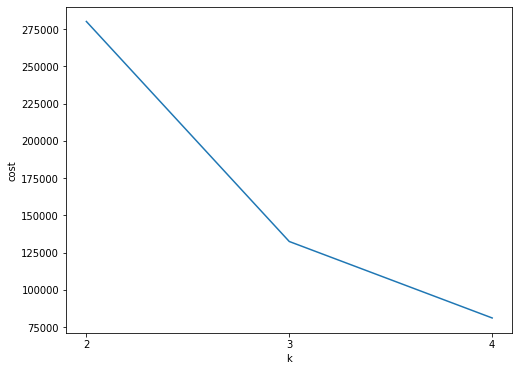

In [ ]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sbs
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,5),cost[2:5])
ax.set_xlabel('k')
ax.set_ylabel('cost')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()